We are the scouting team for one of the best football/soccer teams in the planet, and we need a replacement for our retirement middlefier

Let's start by importing the recquired packages for our analysis

In [1]:
import pandas as pd
import numpy as np
import random

# Random seeds for reproductibility
random.seed(42)
np.random.seed(42)

# **Load the dataset and depict the features**

Load player stats dataset for season 2022-2023, and then, depict the features. We create df_description dataframe with columns feature and description

In [2]:
df = pd.read_csv('/kaggle/input/20222023-football-player-stats/2022-2023 Football Player Stats.csv', encoding='latin1', sep=';')

# We create here a dictionary based on the explanation of each feature from the dataset creator
feature_descriptions = {
    "Rk": "Rank",
    "Player": "Player's name",
    "Nation": "Player's nation",
    "Pos": "Position",
    "Squad": "Squad’s name",
    "Comp": "League that squad occupies",
    "Age": "Player's age",
    "Born": "Year of birth",
    "MP": "Matches played",
    "Starts": "Matches started",
    "Min": "Minutes played",
    "90s": "Minutes played divided by 90",
    "Goals": "Goals scored or allowed",
    "Shots": "Shots total (Does not include penalty kicks)",
    "SoT": "Shots on target (Does not include penalty kicks)",
    "SoT%": "Shots on target percentage (Does not include penalty kicks)",
    "G/Sh": "Goals per shot",
    "G/SoT": "Goals per shot on target (Does not include penalty kicks)",
    "ShoDist": "Average distance, in yards, from goal of all shots taken (Does not include penalty kicks)",
    "ShoFK": "Shots from free kicks",
    "ShoPK": "Penalty kicks made",
    "PKatt": "Penalty kicks attempted",
    "PasTotCmp": "Passes completed",
    "PasTotAtt": "Passes attempted",
    "PasTotCmp%": "Pass completion percentage",
    "PasTotDist": "Total distance, in yards, that completed passes have traveled in any direction",
    "PasTotPrgDist": "Total distance, in yards, that completed passes have traveled towards the opponent's goal",
    "PasShoCmp": "Passes completed (Passes between 5 and 15 yards)",
    "PasShoAtt": "Passes attempted (Passes between 5 and 15 yards)",
    "PasShoCmp%": "Pass completion percentage (Passes between 5 and 15 yards)",
    "PasMedCmp": "Passes completed (Passes between 15 and 30 yards)",
    "PasMedAtt": "Passes attempted (Passes between 15 and 30 yards)",
    "PasMedCmp%": "Pass completion percentage (Passes between 15 and 30 yards)",
    "PasLonCmp": "Passes completed (Passes longer than 30 yards)",
    "PasLonAtt": "Passes attempted (Passes longer than 30 yards)",
    "PasLonCmp%": "Pass completion percentage (Passes longer than 30 yards)",
    "Assists": "Assists",
    "PasAss": "Passes that directly lead to a shot (assisted shots)",
    "Pas3rd": "Completed passes that enter the 1/3 of the pitch closest to the goal",
    "PPA": "Completed passes into the 18-yard box",
    "CrsPA": "Completed crosses into the 18-yard box",
    "PasProg": "Completed passes that move the ball towards the opponent's goal at least 10 yards from its furthest point in the last six passes, or any completed pass into the penalty area",
    "PasAtt": "Passes attempted",
    "PasLive": "Live-ball passes",
    "PasDead": "Dead-ball passes",
    "PasFK": "Passes attempted from free kicks",
    "TB": "Completed pass sent between back defenders into open space",
    "Sw": "Passes that travel more than 40 yards of the width of the pitch",
    "PasCrs": "Crosses",
    "TI": "Throw-Ins taken",
    "CK": "Corner kicks",
    "CkIn": "Inswinging corner kicks",
    "CkOut": "Outswinging corner kicks",
    "CkStr": "Straight corner kicks",
    "PasCmp": "Passes completed",
    "PasOff": "Offsides",
    "PasBlocks": "Blocked by the opponent who was standing it the path",
    "SCA": "Shot-creating actions",
    "ScaPassLive": "Completed live-ball passes that lead to a shot attempt",
    "ScaPassDead": "Completed dead-ball passes that lead to a shot attempt",
    "ScaDrib": "Successful dribbles that lead to a shot attempt",
    "ScaSh": "Shots that lead to another shot attempt",
    "ScaFld": "Fouls drawn that lead to a shot attempt",
    "ScaDef": "Defensive actions that lead to a shot attempt",
    "GCA": "Goal-creating actions",
    "GcaPassLive": "Completed live-ball passes that lead to a goal",
    "GcaPassDead": "Completed dead-ball passes that lead to a goal",
    "GcaDrib": "Successful dribbles that lead to a goal",
    "GcaSh": "Shots that lead to another goal-scoring shot",
    "GcaFld": "Fouls drawn that lead to a goal",
    "GcaDef": "Defensive actions that lead to a goal",
    "Tkl": "Number of players tackled",
    "TklWon": "Tackles in which the tackler's team won possession of the ball",
    "TklDef3rd": "Tackles in defensive 1/3",
    "TklMid3rd": "Tackles in middle 1/3",
    "TklAtt3rd": "Tackles in attacking 1/3",
    "TklDri": "Number of dribblers tackled",
    "TklDriAtt": "Number of times dribbled past plus number of tackles",
    "TklDri%": "Percentage of dribblers tackled",
    "TklDriPast": "Number of times dribbled past by an opposing player",
    "Blocks": "Number of times blocking the ball by standing in its path",
    "BlkSh": "Number of times blocking a shot by standing in its path",
    "BlkPass": "Number of times blocking a pass by standing in its path",
    "Int": "Interceptions",
    "Tkl+Int": "Number of players tackled plus number of interceptions",
    "Clr": "Clearances",
    "Err": "Mistakes leading to an opponent's shot",
    "Touches": "Number of times a player touched the ball. Note: Receiving a pass, then dribbling, then sending a pass counts as one touch",
    "TouDefPen": "Touches in defensive penalty area",
    "TouDef3rd": "Touches in defensive 1/3",
    "TouMid3rd": "Touches in middle 1/3",
    "TouAtt3rd": "Touches in attacking 1/3",
    "TouAttPen": "Touches in attacking penalty area",
    "TouLive": "Live-ball touches. Does not include corner kicks, free kicks, throw-ins, kick-offs, goal kicks or penalty kicks",
    "ToAtt": "Number of attempts to take on defenders while dribbling",
    "ToSuc": "Number of defenders taken on successfully, by dribbling past them",
    "ToSuc%": "Percentage of take-ons Completed Successfully",
    "ToTkl": "Number of times tackled by a defender during a take-on attempt",
    "ToTkl%": "Percentage of time tackled by a defender during a take-on attempt",
    "Carries": "Number of times the player controlled the ball with their feet",
    "CarTotDist": "Total distance, in yards, a player moved the ball while controlling it with their feet, in any direction",
    "CarPrgDist": "Total distance, in yards, a player moved the ball while controlling it with their feet towards the opponent's goal",
    "CarProg": "Carries that move the ball towards the opponent's goal at least 5 yards, or any carry into the penalty area",
    "Car3rd": "Carries that enter the 1/3 of the pitch closest to the goal",
    "CPA": "Carries into the 18-yard box",
    "CarMis": "Number of times a player failed when attempting to gain control of a ball",
    "CarDis": "Number of times a player loses control of the ball after being tackled by an opposing player",
    "Rec": "Number of times a player successfully received a pass",
    "RecProg": "Completed passes that move the ball towards the opponent's goal at least 10 yards from its furthest point in the last six passes, or any completed pass into the penalty area",
    "CrdY": "Yellow cards",
    "CrdR": "Red cards",
    "2CrdY": "Second yellow card",
    "Fls": "Fouls committed",
    "Fld": "Fouls drawn",
    "Off": "Offsides",
    "Crs": "Crosses",
    "TklW": "Tackles in which the tackler's team won possession of the ball",
    "PKwon": "Penalty kicks won",
    "PKcon": "Penalty kicks conceded",
    "OG": "Own goals",
    "Recov": "Number of loose balls recovered",
    "AerWon": "Aerials won",
    "AerLost": "Aerials lost",
    "AerWon%": "Percentage of aerials won"
}

# We create a new Dataframe to add these descriptions
df_description = pd.DataFrame(list(feature_descriptions.items()), columns=['Feature', 'Description'])
df_description.head(5)

,Feature,Description
0,Rk,Rank
1,Player,Player's name
2,Nation,Player's nation
3,Pos,Position
4,Squad,Squad’s name


# **Load data from transfermarkt**

We load players from transfermarkt dataset, for our target of give market value to our result players

In [3]:
# load data from transfermarkt datasets players
df_tr_players = pd.read_csv('/kaggle/input/player-scores/players.csv', encoding='UTF-8', sep=',')
df_tr_players.head(5)

,player_id,first_name,last_name,name,last_season,current_club_id,player_code,country_of_birth,city_of_birth,country_of_citizenship,...,foot,height_in_cm,contract_expiration_date,agent_name,image_url,url,current_club_domestic_competition_id,current_club_name,market_value_in_eur,highest_market_value_in_eur
0,10,Miroslav,Klose,Miroslav Klose,2015,398,miroslav-klose,Poland,Opole,Germany,...,right,184.0,NaN,ASBW Sport Marketing,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/miroslav-klose...,IT1,Società Sportiva Lazio S.p.A.,1000000.0,30000000.0
1,26,Roman,Weidenfeller,Roman Weidenfeller,2017,16,roman-weidenfeller,Germany,Diez,Germany,...,left,190.0,NaN,Neubauer 13 GmbH,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/roman-weidenfe...,L1,Borussia Dortmund,750000.0,8000000.0
2,65,Dimitar,Berbatov,Dimitar Berbatov,2015,1091,dimitar-berbatov,Bulgaria,Blagoevgrad,Bulgaria,...,NaN,NaN,NaN,CSKA-AS-23 Ltd.,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/dimitar-berbat...,GR1,Panthessalonikios Athlitikos Omilos Konstantin...,1000000.0,34500000.0
3,77,NaN,Lúcio,Lúcio,2012,506,lucio,Brazil,Brasília,Brazil,...,NaN,NaN,NaN,NaN,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/lucio/profil/s...,IT1,Juventus Football Club,200000.0,24500000.0
4,80,Tom,Starke,Tom Starke,2017,27,tom-starke,East Germany (GDR),Freital,Germany,...,right,194.0,NaN,IFM,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/tom-starke/pro...,L1,FC Bayern München,100000.0,3000000.0


# **Normalize Categorical Features**

Transform data to improve model performance and accuracy

We filter original dataset with:
- players with more than 10 matchs in the season stats
- players which position is MF

It is a first filter based on our knowledge of football. We need the player has played at least 10 matchs and his position be midfielder

In [4]:
# We normalize the data
from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder

# Filters by player preferences of dataframe season stats
df = df.loc[df['MP'] > 10] # players with more than 10 matchs in the season stats
df = df.loc[df['Pos'] == 'MF'] # players which position is MF

copy_df_initial = df.copy()
numeric_features = [feature for feature in feature_descriptions.keys() if pd.api.types.is_numeric_dtype(df[feature])]
categorical_features = [feature for feature in feature_descriptions.keys() if not pd.api.types.is_numeric_dtype(df[feature])]

encoder = OrdinalEncoder()
df[categorical_features] = encoder.fit_transform(df[categorical_features])

scaler = MinMaxScaler()

df_normalized_rf = df.copy()
df_normalized_cusine = df.copy()
df_normalized_cusine.head(5)

,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,...,Off,Crs,TklW,PKwon,PKcon,OG,Recov,AerWon,AerLost,AerWon%
3,4,294.0,23.0,0.0,46.0,2.0,22,2000,20,20,...,0.00,0.35,0.80,0.0,0.00,0.05,6.60,0.50,0.50,50.0
4,5,184.0,21.0,0.0,50.0,2.0,30,1993,15,15,...,0.00,0.23,2.02,0.0,0.00,0.00,6.51,0.31,0.39,44.4
15,16,336.0,52.0,0.0,44.0,3.0,23,1999,19,19,...,0.05,0.11,2.00,0.0,0.00,0.00,8.68,0.89,0.63,58.6
27,28,358.0,20.0,0.0,92.0,1.0,26,1996,19,12,...,0.00,2.22,0.48,0.0,0.08,0.00,5.71,0.95,1.03,48.0
32,33,249.0,21.0,0.0,84.0,0.0,20,2002,17,17,...,0.06,0.39,0.71,0.0,0.06,0.00,5.68,0.45,1.03,30.4


# **Cosine Similarity**

Here we try to adjust features we are looking. We based on Toni Kroos key features for Passing and Game Vision. In our example, we are looking a replacement for Toni Kroos, but we can change this replacement for any other player

First we normalize non-categorical features

In [5]:
cpt = 0
for feature in feature_descriptions.keys():
    if feature in df.columns:
        df_normalized_cusine[feature] = scaler.fit_transform(df[[feature]])
        cpt += 1
print("{} features have been normalized !".format(cpt))


124 features have been normalized !


Apply cosine_similarity with relevant attributes and show transfermarkt value:

**Cosine similarity is a powerful tool for measuring similarity in various contexts, including evaluating player characteristics in sports analytics. By comparing players based on their performance metrics, you can gain insights into potential player recommendations or scouting opportunities.**

Cosine Similarity is a metric that measures the similarity between two vectors based on the angle between them. It is commonly used in text problems or where data can be represented as vectors in a high-dimensional space (e.g., natural language processing, recommender systems).

In [6]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

# Select relevant columns for similarity calculation
attributes = [
    'PasTotCmp%', 'PasTotDist', 'PasTotPrgDist', 'PasMedCmp%', 'PasLonCmp%', 'PasProg',
    'PasAss', 'SCA', 'GCA', 'Touches', 'TouMid3rd', 'TouAtt3rd', 'Carries',
    'CarTotDist', 'CarPrgDist', 'CarProg', 'Tkl', 'Int', 'TklDri', 'TklDef3rd', 'Blocks'
]

# Filter the DataFrame to include only the relevant attributes
df_attributes = df_normalized_cusine[attributes]

# Compute cosine similarity
similarity_matrix = cosine_similarity(df_attributes)

# add to df original columns for better understanding of future result
df_normalized_cusine.loc[:, 'Player'] = copy_df_initial['Player']
df_normalized_cusine.loc[:, 'Squad'] = copy_df_initial['Squad']
df_normalized_cusine.loc[:, 'Age'] = copy_df_initial['Age']

# Convert the similarity matrix into a DataFrame for easier interpretation
similarity_df = pd.DataFrame(similarity_matrix, index=df_normalized_cusine['Player'], columns=df_normalized_cusine['Player'])

# Identify the top similar players to a specific player (e.g., Toni Kroos)
target_player = 'Toni Kroos'  # Replace with the exact name in your dataset
similar_players = similarity_df[target_player].sort_values(ascending=False).drop(target_player)
similar_players = similar_players.head(10)
print(similar_players)

initial_df_similar_players = copy_df_initial[copy_df_initial['Player'].isin(similar_players.index)] # Display the top 5 most similar players to Toni Kroos

df_top_similar = pd.merge(df_tr_players, initial_df_similar_players, left_on='name', right_on='Player', how='inner')

df_top_similar['market_value_in_eur'] = df_top_similar['market_value_in_eur'] / 1_000_000
df_top_similar = df_top_similar[['name', 'Squad', 'Age', 'market_value_in_eur']]
df_top_similar

# note: it is possible that could be some player not appearing in df_top_similar appearing before in similar_players as it can be lossed in merge with transfermark dataframe

Player
Corentin Tolisso    0.986522
Rodri               0.980046
Jordan Henderson    0.979380
Daniel Parejo       0.976247
Thomas Partey       0.975827
Joshua Kimmich      0.974838
Téji Savanier       0.973642
Mateo Kova?i?       0.973008
André Gomes         0.970764
Maxime Lopez        0.970640
Name: Toni Kroos, dtype: float64


,name,Squad,Age,market_value_in_eur
0,Rodri,Manchester City,26,0.25
1,Jordan Henderson,Liverpool,32,4.00
2,Téji Savanier,Montpellier,31,7.00
3,Joshua Kimmich,Bayern Munich,28,50.00
4,Corentin Tolisso,Lyon,28,5.00
5,André Gomes,Lille,29,10.00
6,Thomas Partey,Arsenal,29,18.00
7,Rodri,Manchester City,26,130.00
8,André Gomes,Lille,29,2.00


# **Random Forest Model**

**Add param: Suitable for team**

First we normalize non-categorical data adding suitable_for_team key feature, based on own knowledge on football

Here we have gained features values based on Toni Kroos from 'football-player-stats' dataset

In [7]:
df_normalized_rf['suitable_for_team'] = (
    # Pass
    (df_normalized_rf['PasTotCmp%'] > 60) & #Pass completion percentage
    (df_normalized_rf['PasTotDist'] > 1000) & #Total distance, in yards, that completed passes have traveled in any direction
    (df_normalized_rf['PasTotPrgDist'] > 300) & #Total distance, in yards, that completed passes have traveled towards the opponent's goal
    (df_normalized_rf['PasMedCmp%'] > 90) & #Pass completion percentage (Passes between 15 and 30 yards)
    (df_normalized_rf['PasLonCmp%'] > 5) & #Pass completion percentage (Passes longer than 30 yards)
    (df_normalized_rf['PasProg'] > 8) & #Completed passes that move the ball towards the opponent's goal at least 10 yards from its furthest point in the last six passes, or any completed pass into the penalty area
    # Vision
    (df_normalized_rf['PasAss'] > 2) & #Passes that directly lead to a shot (assisted shots)
    (df_normalized_rf['SCA'] > 4) & #Shot-creating actions
    (df_normalized_rf['GCA'] > 0.2) #Goal-creating actions
 ).astype(int)

cpt = 0
for feature in feature_descriptions.keys():
    if feature in df.columns:
        df_normalized_rf[feature] = scaler.fit_transform(df[[feature]])
        cpt += 1
print("{} features have been normalized !".format(cpt))

124 features have been normalized !


Here we use RandomForestClassifier for predict which players can be similars to our player, based on key features

Random Forest is an ensemble method based on multiple decision trees, where each tree receives a different sample from the original dataset and a random subset of features.

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        73

    accuracy                           1.00        73
   macro avg       1.00      1.00      1.00        73
weighted avg       1.00      1.00      1.00        73

Accuracy: 100.00%


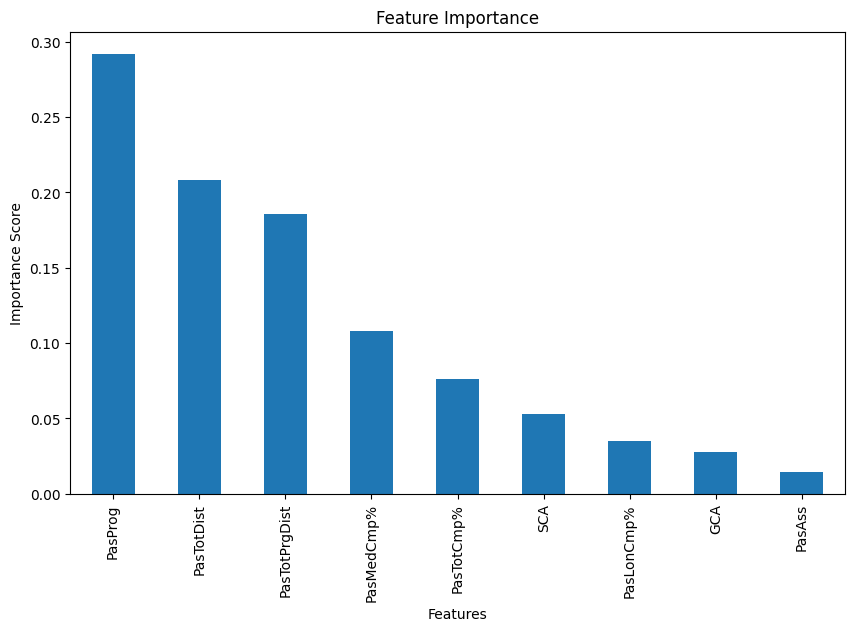

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns

# select key characteristics and target
features = ['PasTotCmp%', 'PasTotDist', 'PasTotPrgDist', 'PasMedCmp%', 'PasLonCmp%', 'PasProg', 'PasAss', 'SCA', 'GCA']

X = df_normalized_rf[features]
y = df_normalized_rf['suitable_for_team']

# divide in training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# train random forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# make prediction
y_pred = model.predict(X_test)

# Evaluate model
print(classification_report(y_test, y_pred))

# Evaluate
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Get feature importance
feature_importance = pd.Series(model.feature_importances_, index=features).sort_values(ascending=False)

# Plotting feature importance
plt.figure(figsize=(10, 6))
feature_importance.plot(kind='bar')
plt.title("Feature Importance")
plt.ylabel("Importance Score")
plt.xlabel("Features")
plt.show()

**We make a prediction on full dataset**

In [9]:
# make prediction on full dataset
df_normalized_rf['Predicted_Suitability'] = model.predict(df_normalized_rf[features])

# filter recommended players
recommended_players = df_normalized_rf[df_normalized_rf['Predicted_Suitability'] == 1]

# watch only main features
print(recommended_players[features])

      PasTotCmp%  PasTotDist  PasTotPrgDist  PasMedCmp%  PasLonCmp%  PasProg  \
466     0.972399    0.726919       0.570996    0.978395       0.870  0.96063   
1337    0.964968    1.000000       1.000000    0.977366       0.725  1.00000   

        PasAss       SCA       GCA  
466   0.616667  0.779141  0.562500  
1337  0.597222  0.716258  0.196429  


**Extract Player and Get current value from transfermarkt**

In [10]:
recommended_players.loc[:, 'Player'] = copy_df_initial['Player']
recommended_players.loc[:, 'Squad'] = copy_df_initial['Squad']
recommended_players.loc[:, 'Age'] = copy_df_initial['Age']

recommended_players_filtered = recommended_players[['Player', 'Squad', 'Age']].copy()

df_top_merged = pd.merge(df_tr_players, recommended_players_filtered, left_on='name', right_on='Player', how='inner')

df_top_merged['market_value_in_eur'] = df_top_merged['market_value_in_eur'] / 1_000_000
df_top_merged = df_top_merged[['name', 'Squad', 'Age', 'market_value_in_eur']]
df_top_merged

,name,Squad,Age,market_value_in_eur
0,Toni Kroos,Real Madrid,33.0,10.0
1,Dani Ceballos,Real Madrid,26.0,4.0


We see that if we be Real Madrid, we don´t have to search our replace in any other team! as we have it in house ...

# Gradient Boosting

Good for classification and regression tasks. It builds models in a sequential manner

Gradient Boosting is an ensemble type machine learning technique that combines multiple "weak" models (usually decision trees) to create a "strong" model. It aims to improve the performance of models by iteratively fine-tuning a model that corrects the errors of the previous model.

In [11]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Example DataFrame - ensure you have your features and target ready
features = ['PasTotCmp%', 'PasTotDist', 'PasTotPrgDist', 'PasMedCmp%', 'PasLonCmp%', 'PasProg', 'PasAss', 'SCA', 'GCA']
X = df_normalized_rf[features]
y = df_normalized_rf['suitable_for_team']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the Gradient Boosting model
model = GradientBoostingClassifier(random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
confusion = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(confusion)

Accuracy: 100.00%

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       110

    accuracy                           1.00       110
   macro avg       1.00      1.00      1.00       110
weighted avg       1.00      1.00      1.00       110


Confusion Matrix:
[[110]]


**We make a prediction on full dataset**

In [12]:
# make prediction on full dataset
df_normalized_rf['Predicted_Suitability'] = model.predict(df_normalized_rf[features])

# filter recommended players
recommended_players = df_normalized_rf[df_normalized_rf['Predicted_Suitability'] == 1]

# watch only main features
print(recommended_players[features])

      PasTotCmp%  PasTotDist  PasTotPrgDist  PasMedCmp%  PasLonCmp%  PasProg  \
466     0.972399    0.726919       0.570996    0.978395       0.870  0.96063   
1337    0.964968    1.000000       1.000000    0.977366       0.725  1.00000   

        PasAss       SCA       GCA  
466   0.616667  0.779141  0.562500  
1337  0.597222  0.716258  0.196429  


**Extract Player and Get current value from transfermarkt**

In [13]:
recommended_players.loc[:, 'Player'] = copy_df_initial['Player']
recommended_players.loc[:, 'Squad'] = copy_df_initial['Squad']
recommended_players.loc[:, 'Age'] = copy_df_initial['Age']

recommended_players_filtered = recommended_players[['Player', 'Squad', 'Age']].copy()

df_top_merged = pd.merge(df_tr_players, recommended_players_filtered, left_on='name', right_on='Player', how='inner')

df_top_merged['market_value_in_eur'] = df_top_merged['market_value_in_eur'] / 1_000_000
df_top_merged = df_top_merged[['name', 'Squad', 'Age', 'market_value_in_eur']]
df_top_merged

,name,Squad,Age,market_value_in_eur
0,Toni Kroos,Real Madrid,33.0,10.0
1,Dani Ceballos,Real Madrid,26.0,4.0


# Neural Network with MLPClassifier

The MLPClassifier (Multilayer Perceptron Classifier) ​​in scikit-learn is a feedforward neural network. It consists of several layers of neurons (an input layer, one or more hidden layers, and an output layer) and uses non-linear activation functions.

Accuracy: 100.00%

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       110

    accuracy                           1.00       110
   macro avg       1.00      1.00      1.00       110
weighted avg       1.00      1.00      1.00       110


Confusion Matrix:
[[110]]


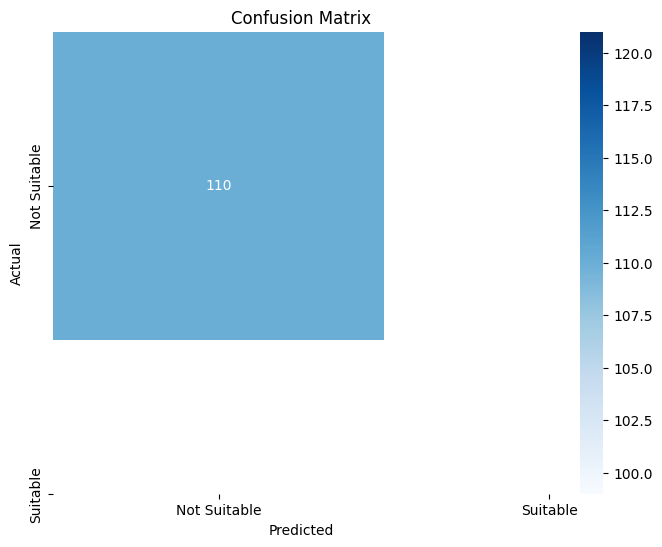

In [14]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_normalized is your DataFrame
# Features to be used for training
features = ['PasTotCmp%', 'PasTotDist', 'PasTotPrgDist', 'PasMedCmp%', 'PasLonCmp%', 'PasProg', 'PasAss', 'SCA', 'GCA']

# Prepare your features (X) and target (y)
X = df_normalized_rf[features]
y = df_normalized_rf['suitable_for_team']  # Assuming this is your target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the Neural Network model
mlp = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)
mlp.fit(X_train, y_train)

# Make predictions
y_pred = mlp.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
confusion = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(confusion)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Suitable', 'Suitable'], yticklabels=['Not Suitable', 'Suitable'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

**We make a prediction on full dataset**

In [15]:
# make prediction on full dataset
df_normalized_rf['Predicted_Suitability'] = mlp.predict(df_normalized_rf[features])

# filter recommended players
recommended_players = df_normalized_rf[df_normalized_rf['Predicted_Suitability'] == 1]

# watch only main features
print(recommended_players[features])

      PasTotCmp%  PasTotDist  PasTotPrgDist  PasMedCmp%  PasLonCmp%  PasProg  \
1337    0.964968         1.0            1.0    0.977366       0.725      1.0   

        PasAss       SCA       GCA  
1337  0.597222  0.716258  0.196429  


**Extract Player and Get current value from transfermarkt**

In [16]:
recommended_players.loc[:, 'Player'] = copy_df_initial['Player']
recommended_players.loc[:, 'Squad'] = copy_df_initial['Squad']
recommended_players.loc[:, 'Age'] = copy_df_initial['Age']

recommended_players_filtered = recommended_players[['Player', 'Squad', 'Age']].copy()

df_top_merged = pd.merge(df_tr_players, recommended_players_filtered, left_on='name', right_on='Player', how='inner')

df_top_merged['market_value_in_eur'] = df_top_merged['market_value_in_eur'] / 1_000_000
df_top_merged = df_top_merged[['name', 'Squad', 'Age', 'market_value_in_eur']]
df_top_merged

,name,Squad,Age,market_value_in_eur
0,Toni Kroos,Real Madrid,33.0,10.0
